In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("./data/soccer.sqlite")
conn

In [4]:
tables = pd.read_sql(
        """
        SELECT * FROM sqlite_master WHERE type='table';
        """, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [6]:
countries = pd.read_sql("""
    SELECT * FROM Country;
""", conn
)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [8]:
leagues_df = pd.read_sql(""" SELECT * FROM League JOIN Country ON Country.id=League.country_id""",conn)
leagues_df

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [17]:
leagues_df.merge(countries,how="inner", left_on="country_id",right_on="id",suffixes=["_league", "_country"])

,id_league,country_id,name_league,id_league,name_league,id_country,name_country
0,1,1,Belgium Jupiler League,1,Belgium,1,Belgium
1,1729,1729,England Premier League,1729,England,1729,England
2,4769,4769,France Ligue 1,4769,France,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain,21518,Spain


In [18]:
teams_df = pd.read_sql("""
SELECT * FROM Team ORDER BY team_long_name LIMIT 10
""",conn)
teams_df

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [22]:
pd.read_sql("""
    SELECT season, COUNT(Match.id), AVG(home_team_goal), AVG(away_team_goal), AVG(home_team_goal + away_team_goal), AVG(home_team_goal - away_team_goal) FROM MATCH
    JOIN Country ON Country.id=Match.country_id
    JOIN League ON League.id=Match.league_id
    LEFT JOIN Team AS HomeTeam ON HomeTeam.team_api_id=Match.home_team_api_id
    LEFT JOIN Team AS AwayTeam ON AwayTeam.team_api_id=Match.away_team_api_id
    WHERE Country.name = "England"
    GROUP BY season;
""", conn)

,season,COUNT(Match.id),AVG(home_team_goal),AVG(away_team_goal),AVG(home_team_goal + away_team_goal),AVG(home_team_goal - away_team_goal)
0,2008/2009,380,1.400000,1.078947,2.478947,0.321053
1,2009/2010,380,1.697368,1.073684,2.771053,0.623684
2,2010/2011,380,1.623684,1.173684,2.797368,0.450000
3,2011/2012,380,1.589474,1.215789,2.805263,0.373684
4,2012/2013,380,1.557895,1.239474,2.797368,0.318421
5,2013/2014,380,1.573684,1.194737,2.768421,0.378947
6,2014/2015,380,1.473684,1.092105,2.565789,0.381579
7,2015/2016,380,1.492105,1.207895,2.700000,0.284211


In [30]:
countries_df = pd.read_sql("SELECT * FROM Country", conn)
print("Countries shape: {}".format(countries_df.shape))
print("Columns: {}".format(countries_df.columns))
leagues_df = pd.read_sql("SELECT * FROM League", conn)
print("Leagues shape: {}".format(leagues_df.shape))
print("Columns: {}".format(leagues_df.columns))
team_df = pd.read_sql("SELECT * FROM Team", conn)
print("Team shape: {}".format(team_df.shape))
print("Columns: {}".format(team_df.columns))
matches_df = pd.read_sql("SELECT * FROM Match", conn)
print("Match shape: {}".format(matches_df.shape))
print("Columns: {}".format(matches_df.columns))




Countries shape: (11, 2)
Columns: Index(['id', 'name'], dtype='object')
Leagues shape: (11, 3)
Columns: Index(['id', 'country_id', 'name'], dtype='object')
Team shape: (299, 5)
Columns: Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')
Match shape: (25979, 115)
Columns: Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)


In [31]:
matches_countries_df = matches_df.merge(countries_df, left_on="country_id", right_on="id", suffixes=["_match","_country"])
matches_countries_df

,id_match,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_country,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24558,Switzerland
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24558,Switzerland
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24558,Switzerland
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24558,Switzerland


In [34]:
matches_countries_leagues_df = matches_countries_df.merge(leagues_df,
                                                        left_on="league_id", right_on="id",
                                                        suffixes=["_country","_league"])
matches_countries_leagues_df

,id_match,country_id_country,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBD,GBA,BSH,BSD,BSA,id_country,name_country,id,country_id_league,name_league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.25,4.00,1.73,3.40,4.20,1,Belgium,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.75,1.91,3.25,3.60,1,Belgium,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.20,2.50,2.30,3.20,2.75,1,Belgium,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,5.50,1.44,3.75,6.50,1,Belgium,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.50,1.65,4.75,3.30,1.67,1,Belgium,1,1,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,24558,Switzerland,24558,24558,Switzerland Super League
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,24558,Switzerland,24558,24558,Switzerland Super League
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,24558,Switzerland,24558,24558,Switzerland Super League
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,24558,Switzerland,24558,24558,Switzerland Super League


In [39]:
home_matches_countries_leagues_df = matches_countries_leagues_df.merge(team_df, how="left", left_on="home_team_api_id", right_on="team_api_id")
away_home_matches_countries_leagues_df = home_matches_countries_leagues_df.merge(team_df, how="left",
left_on="away_team_api_id", right_on="team_api_id" )
away_home_matches_countries_leagues_df

,id_match,country_id_country,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,id_y,team_api_id_x,team_fifa_api_id_x,team_long_name_x,team_short_name_x,id,team_api_id_y,team_fifa_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3,10000,15005.0,SV Zulte-Waregem,ZUL,4,9994,2007.0,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,5,9984,1750.0,KSV Cercle Brugge,CEB,6,8635,229.0,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7,9991,674.0,KAA Gent,GEN,8,9998,1747.0,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,9,7947,NaN,FCV Dender EH,DEN,10,9985,232.0,Standard de Liège,STL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,49479,10190,898.0,FC St. Gallen,GAL,49837,10191,1715.0,FC Thun,THU
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,49122,9824,286.0,FC Vaduz,VAD,49121,10199,897.0,FC Luzern,LUZ
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,49115,9956,322.0,Grasshopper Club Zürich,GRA,49120,10179,110770.0,FC Sion,SIO
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,51606,7896,NaN,Lugano,LUG,49124,10243,894.0,FC Zürich,ZUR


In [41]:
england_df = away_home_matches_countries_leagues_df[away_home_matches_countries_leagues_df["name_country"] == "England"]
england_df["name_country"]

1728    England
1729    England
1730    England
1731    England
1732    England
         ...   
4763    England
4764    England
4765    England
4766    England
4767    England
Name: name_country, Length: 3040, dtype: object

In [44]:
england_df.groupby("season").mean()["away_team_goal"]

season
2008/2009    1.078947
2009/2010    1.073684
2010/2011    1.173684
2011/2012    1.215789
2012/2013    1.239474
2013/2014    1.194737
2014/2015    1.092105
2015/2016    1.207895
Name: away_team_goal, dtype: float64

In [47]:
operations = {
    "id_match" : "count",
    "home_team_goal":"mean",
    "away_team_goal": "mean"
}
stats_df = england_df.groupby("season").agg(operations)

In [49]:
stats_df["media_gols_na_partida"] = stats_df["home_team_goal"] + stats_df["away_team_goal"]
stats_df["home_diff_away"] = stats_df["home_team_goal"] - stats_df["away_team_goal"]
stats_df

,id_match,home_team_goal,away_team_goal,media_gols_na_partida,home_diff_away
season,,,,,
2008/2009,380,1.400000,1.078947,2.478947,0.321053
2009/2010,380,1.697368,1.073684,2.771053,0.623684
2010/2011,380,1.623684,1.173684,2.797368,0.450000
2011/2012,380,1.589474,1.215789,2.805263,0.373684
2012/2013,380,1.557895,1.239474,2.797368,0.318421
2013/2014,380,1.573684,1.194737,2.768421,0.378947
2014/2015,380,1.473684,1.092105,2.565789,0.381579
2015/2016,380,1.492105,1.207895,2.700000,0.284211


(0, 1)

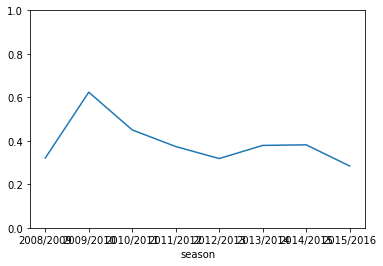

In [51]:
ax = stats_df["home_diff_away"].plot()
ax.set_ylim(0,1)
